# DecoupleR Pseudobulk Analysis

**Authorship:**
Adam Klie, *10/27/2022*
***
**Description:**
Notebook to run a decoupleR analysis stimulated pancreatic islet multiome data (well just the RNA)
***

# Set-up

In [27]:
import numpy as np
import pandas as pd

import scanpy as sc
import decoupler as dc

import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Parameters
CELL_TYPES = "beta"  # Meaning α, β, δ in this context
NORMALIZATION = "ND"
GENES = "all"

# Data loading

In [29]:
H5AD_FILE = "/cellar/users/aklie/data/beta_cell_networks/multiomic_stimulated_sc/14sep22_DM023_palmitate_endocrine.h5ad"

In [44]:
adata0 = sc.read_h5ad(H5AD_FILE)
adata0.obsm["X_umap"] = adata0.obsm["UMAP.SCT"]
adata0

AnnData object with n_obs × n_vars = 16342 × 28796
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'nCount_ATAC', 'nFeature_ATAC', 'nCount_SCT', 'nFeature_SCT', 'SCT.weight', 'ATAC.weight', 'wsnn_res.0.2', 'seurat_clusters', 'log_nCount_ATAC', 'log_nCount_SCT', 'log_nFeature_ATAC', 'log_nFeature_SCT', 'nCount_mpeak', 'nFeature_mpeak', 'batch', 'condition', 'time_point', 'sample', 'atac_raw_reads', 'atac_mitochondrial_reads', 'atac_fragments', 'atac_pct.mt', 'TSS.enrichment', 'TSS.percentile', 'mpeak.weight', 'wsnn_res.0.3', 'nCount_peaks', 'nFeature_peaks', 'peaks.weight', 'wsnn_res.0.5', 'nCount_peak', 'nFeature_peak', 'cell.type.1', 'cell.type.2', 'ident'
    obsm: 'HARMONY.SCT', 'UMAP.SCT', 'X_pca', 'X_umap'
    layers: 'logcounts'

# Prepare data for decoupleR with single cells as pseudobulk

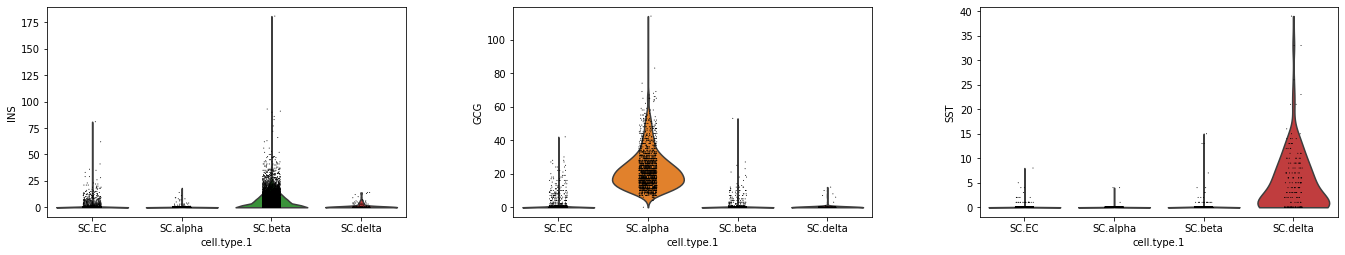

In [45]:
sc.pl.violin(adata0, ['INS', 'GCG', 'SST'], groupby='cell.type.1' )

In [53]:
adata0.layers["counts"] = adata0.X

In [54]:
# Grab only α, β and δ cells
if CELL_TYPES == "all":
    adata = adata0
elif CELL_TYPES == "beta":
    adata = adata0[adata0.obs["cell.type.1"] == "SC.beta"]
elif CELL_TYPES == "alpha":
    adata = adata0[adata0.obs["cell.type.1"] == "SC.alpha"]
elif CELL_TYPES == "delta":
    adata = adata0[adata0.obs["cell.type.1"] == "SC.delta"]
elif CELL_TYPES == "endocrine":
    adata = adata0[adata0.obs["cell.type.1"] == "SC.EC"]

In [55]:
adata.raw = adata

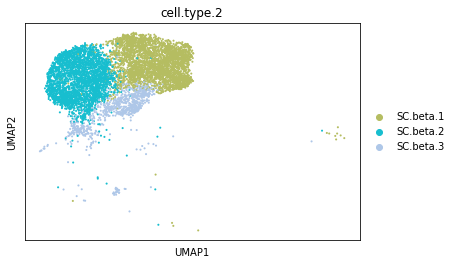

In [56]:
sc.pl.umap(adata, color="cell.type.2")

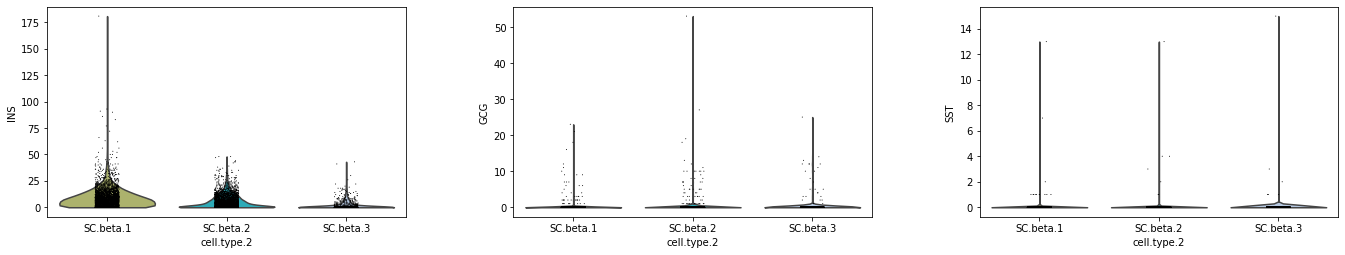

In [57]:
sc.pl.violin(adata, ['INS', 'GCG', 'SST'], groupby='cell.type.2')

# Generate pseudo-bulk profile for each sample

In [58]:
# Get pseudo-bulk profile
padata = dc.get_pseudobulk(adata, sample_col='sample', groups_col='cell.type.2', layer='counts', min_prop=0.2, min_smpls=3)

/cellar/users/aklie/opt/miniconda3/envs/scverse-py38/lib/python3.8/site-packages/decoupler/utils_anndata.py:268: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  psbulk = AnnData(psbulk, obs=new_obs, var=new_var)


In [59]:
padata.obs

,orig.ident,seurat_clusters,batch,condition,time_point,sample,wsnn_res.0.5,cell.type.1,cell.type.2,ident
MO1_SC.beta.1,SeuratProject,0,DM017,ctrl,0,MO1,0,SC.beta,SC.beta.1,SC.beta
MO14_SC.beta.1,SeuratProject,0,DM017,ctrl,6,MO14,0,SC.beta,SC.beta.1,SC.beta
MO18_SC.beta.1,SeuratProject,0,DM017,palmitate,24,MO18,0,SC.beta,SC.beta.1,SC.beta
MO22_SC.beta.1,SeuratProject,0,DM017,ctrl,24,MO22,0,SC.beta,SC.beta.1,SC.beta
MO26_SC.beta.1,SeuratProject,0,DM017,palmitate,48,MO26,0,SC.beta,SC.beta.1,SC.beta
MO29_SC.beta.1,SeuratProject,0,DM017,ctrl,48,MO29,0,SC.beta,SC.beta.1,SC.beta
MO3_SC.beta.1,SeuratProject,0,DM017,ctrl,0,MO3,0,SC.beta,SC.beta.1,SC.beta
MO33_SC.beta.1,SeuratProject,0,DM017,palmitate,72,MO33,0,SC.beta,SC.beta.1,SC.beta
MO38_SC.beta.1,SeuratProject,0,DM017,ctrl,72,MO38,0,SC.beta,SC.beta.1,SC.beta
MO9_SC.beta.1,SeuratProject,0,DM017,palmitate,6,MO9,0,SC.beta,SC.beta.1,SC.beta


In [60]:
# Normalize the pseudobulk
sc.pp.normalize_total(padata, target_sum=1e4)
sc.pp.log1p(padata)
padata

/cellar/users/aklie/opt/miniconda3/envs/scverse-py38/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


AnnData object with n_obs × n_vars = 30 × 6022
    obs: 'orig.ident', 'seurat_clusters', 'batch', 'condition', 'time_point', 'sample', 'wsnn_res.0.5', 'cell.type.1', 'cell.type.2', 'ident'
    uns: 'log1p'

# Get DEGs for each group uisng palmitate as treatment

In [61]:
logFCs, pvals = dc.get_contrast(
    padata,
    group_col='cell.type.2',
    condition_col='condition',
    condition='palmitate',
    reference='ctrl',
    method='t-test'
)
logFCs

,A1CF,AACS,AADAT,AAGAB,AAK1,AAMDC,AARS,AASDH,AASDHPPT,AASS,...,ZSCAN30,ZSCAN5A,ZSWIM5,ZSWIM6,ZSWIM7,ZSWIM8,ZUP1,ZXDC,ZYG11B,ZZEF1
SC.beta.1,0.082258,0.023527,0.074593,0.026430,-0.065613,0.000000,0.236666,0.156864,-0.108089,0.07178,...,0.014352,0.183687,0.000811,-0.240755,0.060161,0.348072,-0.091825,0.134560,-0.142533,0.148372
SC.beta.2,-0.098824,0.016769,0.000000,-0.214061,-0.157981,0.000000,-0.037700,0.370087,0.000572,0.00000,...,-0.050678,0.403508,0.162423,0.002061,0.000000,0.295162,-0.016384,0.015392,-0.179704,0.111685
SC.beta.3,-0.144005,-0.189003,0.000000,0.560952,0.026239,0.091394,0.349848,0.301216,0.139463,0.00000,...,0.080987,0.410264,0.108506,-0.325638,-0.287666,0.283327,0.005716,0.135733,0.126691,0.201833


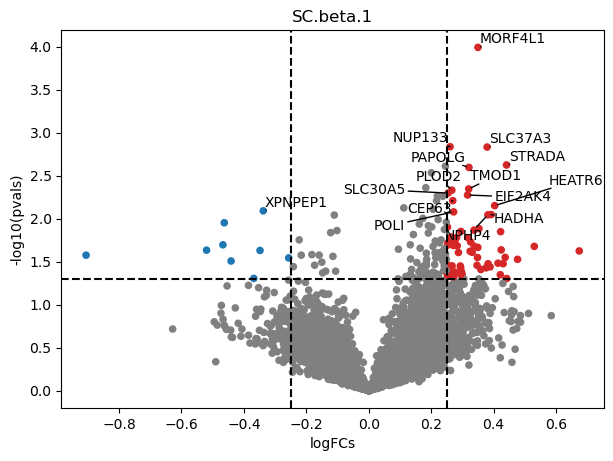

In [63]:
# Check one
dc.plot_volcano(logFCs, pvals, 'SC.beta.1', top=15, sign_thr=0.05, lFCs_thr=0.25)

# Pathway activity inference from DEGs

In [67]:
model = dc.get_progeny(organism='human', top=100)
model

,source,target,weight,p_value
0,Androgen,TMPRSS2,11.490631,0.000000e+00
1,Androgen,NKX3-1,10.622551,2.242078e-44
2,Androgen,MBOAT2,10.472733,4.624285e-44
3,Androgen,KLK2,10.176186,1.944414e-40
4,Androgen,SARG,11.386852,2.790209e-40
...,...,...,...,...
1395,p53,CCDC150,-3.174527,7.396252e-13
1396,p53,LCE1A,6.154823,8.475458e-13
1397,p53,TREM2,4.101937,9.739648e-13
1398,p53,GDF9,3.355741,1.087433e-12


In [65]:
pathway_acts, pathway_pvals = dc.run_mlm(mat=logFCs, net=model, source='source', target='target', weight='weight', verbose=True)

Running mlm on mat with 3 samples and 6022 targets for 14 sources.


100%|██████████| 1/1 [00:00<00:00, 69.89it/s]


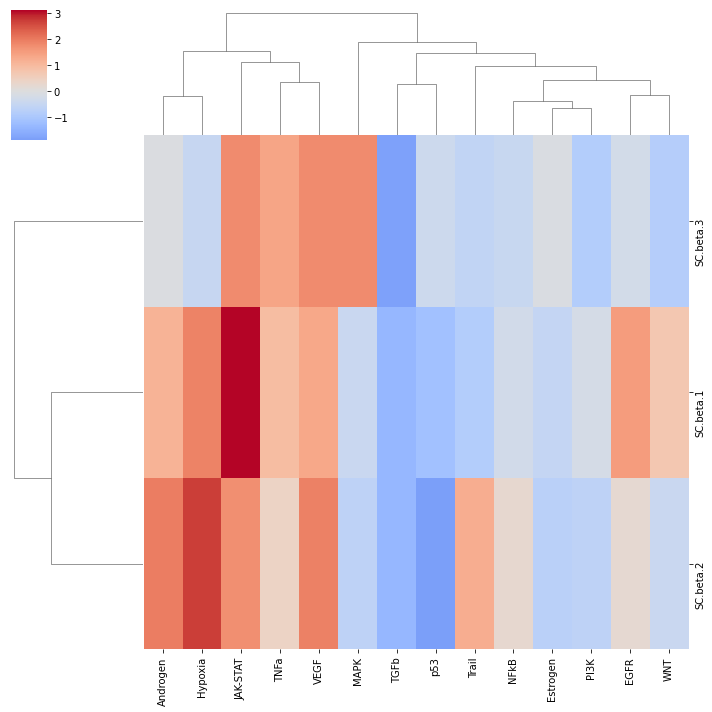

In [66]:
# Set nans to zero to be able to plot
pathway_acts.fillna(0, inplace=True)

sns.clustermap(pathway_acts, center=0, cmap='coolwarm')
plt.show()

# TF Activity inference from DEGs

In [68]:
net = dc.get_dorothea(organism='human', levels=['A','B','C'])
net

,source,confidence,target,weight
0,ETS1,A,IL12B,1.000000
1,RELA,A,IL6,1.000000
2,MITF,A,BCL2A1,-1.000000
3,E2F1,A,TRERF1,1.000000
4,MITF,A,BCL2,1.000000
...,...,...,...,...
32272,IKZF1,C,PTK2B,0.333333
32273,IKZF1,C,PRKCB,0.333333
32274,IKZF1,C,PREX1,0.333333
32275,IRF4,C,SLAMF7,0.333333


In [69]:
tf_acts, tf_pvals = dc.run_mlm(mat=logFCs, net=net, source='source', target='target', weight='weight', verbose=True)

Running mlm on mat with 3 samples and 6022 targets for 265 sources.


100%|██████████| 1/1 [00:00<00:00, 16.82it/s]


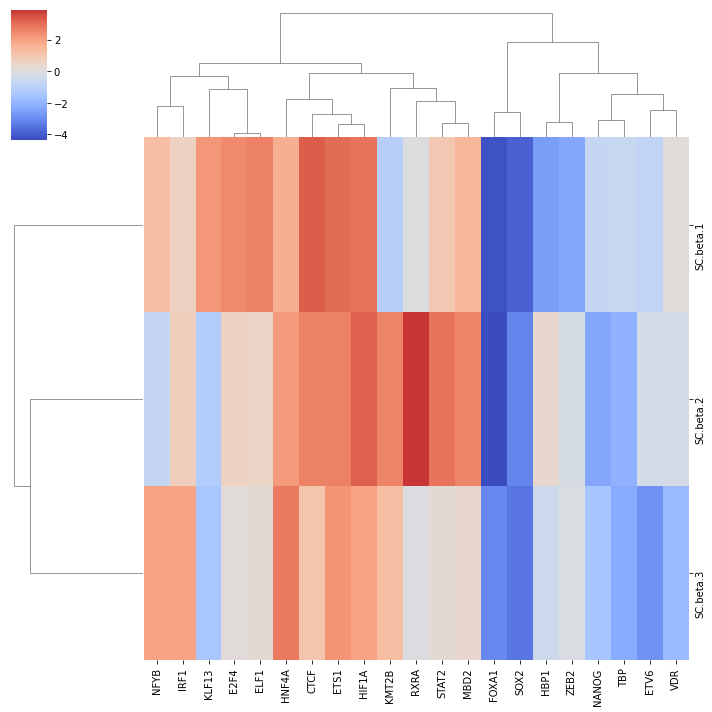

In [70]:
# Set nans to zero to be able to plot
tf_acts.fillna(0, inplace=True)

# Get top 10 most active/inactive sources
top = 10
top_idxs = set()
for row in tf_acts.values:
    sort_idxs = np.argsort(-np.abs(row))
    top_idxs.update(sort_idxs[:top])
top_idxs = np.array(list(top_idxs))
top_names = tf_acts.columns[top_idxs]
names = tf_acts.index.values
top = pd.DataFrame(tf_acts.values[:,top_idxs], columns=top_names, index=names)

# Plot
sns.clustermap(top, center=0, cmap='coolwarm')
plt.show()

# Functional enrichment

In [74]:
# Retrieve MSigDB resource
msigdb = dc.get_resource('MSigDB')
msigdb

# Filter by a desired geneset collection, for example hallmarks
msigdb = msigdb[msigdb['collection']=='hallmark']
msigdb = msigdb.drop_duplicates(['geneset', 'genesymbol'])

# Infer enrichment with ora using significant deg
top_genes = dc.format_contrast_results(logFCs, pvals)
top_genes = top_genes[(np.abs(top_genes['logFCs']) > 0.25) & (top_genes['pvals'] < 0.05)]
enr_pvals = dc.get_ora_df(top_genes, msigdb, groupby='contrast', features='name', source='geneset', target='genesymbol')
enr_pvals

,HALLMARK_E2F_TARGETS,HALLMARK_FATTY_ACID_METABOLISM,HALLMARK_G2M_CHECKPOINT,HALLMARK_GLYCOLYSIS,HALLMARK_IL2_STAT5_SIGNALING,HALLMARK_INTERFERON_GAMMA_RESPONSE,HALLMARK_MTORC1_SIGNALING,HALLMARK_OXIDATIVE_PHOSPHORYLATION,HALLMARK_UV_RESPONSE_DN
SC.beta.1,0.021409,1.000000,1.787264e-02,0.021409,8.878064e-07,0.021409,0.021409,0.021409,2.652779e-04
SC.beta.2,0.000217,0.000001,1.000000e+00,0.000001,1.000000e+00,0.000217,0.000217,0.000001,3.034256e-04
SC.beta.3,0.000009,0.000009,1.636767e-08,0.000009,8.633146e-06,0.000009,0.000009,0.000855,1.132122e-07


In [75]:
# Set 0s to min p-value
enr_pvals.values[enr_pvals.values == 0] = np.min(enr_pvals.values[enr_pvals.values != 0])

# Log-transform
enr_pvals = -np.log10(enr_pvals)

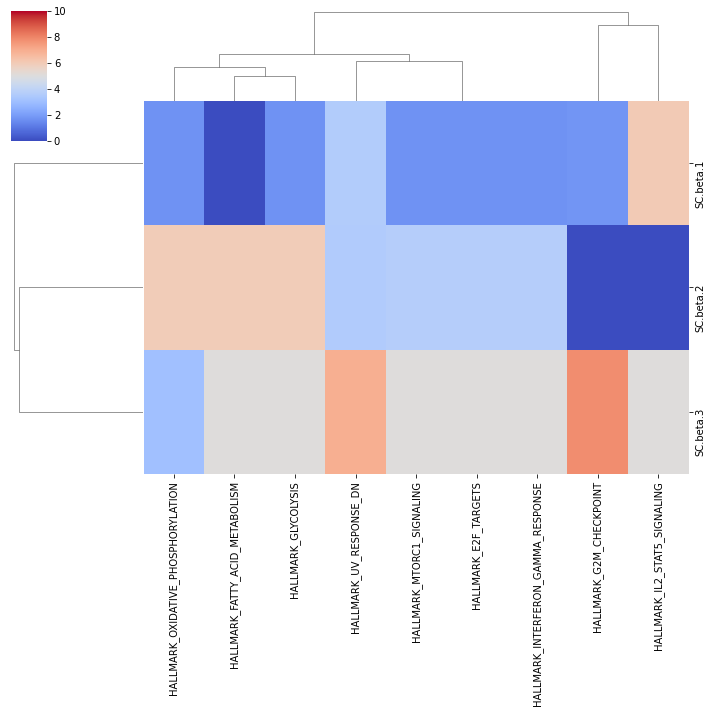

In [77]:
# Get top 10 most active/inactive sources
top = 10
top_idxs = set()
for row in enr_pvals.values:
    sort_idxs = np.argsort(-np.abs(row))
    top_idxs.update(sort_idxs[:top])
top_idxs = np.array(list(top_idxs))
top_names = enr_pvals.columns[top_idxs]
names = enr_pvals.index.values
top = pd.DataFrame(enr_pvals.values[:, top_idxs], columns=top_names, index=names)

# Plot
sns.clustermap(top, cmap='coolwarm', vmax=10)
plt.show()

---